# Análise Exploratória de Dados da Rinha de Backend 2023

Uma análise do readme dos participantes da rinha para buscar qual linguagem de programação cada participante utilizou.

## Leitura dos arquivos dos participantes

A organização do projeto facilitou esse trabalho. Basicamente na pasta participantes, tem uma pasta para cada candidato. Dentro da pasta de cada candidato em o arquivo readme que cada participante escreveu que consiste na documentação do seu projeto informando quais linguagens utilizou, banco de dados, protocos de comunicação e links úteis e etc.

participantes/<br>
    > participante_A/<br>
    > participante_B/<br>
    > participante_C/<br>
    > participante_D/<br>
    > ...

O primeiro desafio é pegar o nome e o texto do readme de cada participante, podemos fazer isso com o seguinte código


In [1]:
import pandas as pd
import numpy as np
import os
from io import StringIO

os.chdir('../../participantes')

def pega_texto_readme(pasta, arquivo):
    path = os.path.join(pasta, arquivo)
    f = open(path)
    conteudo = f.read()
    f.close()
    return conteudo

dados = []
for participante in os.listdir():
    readme = [p for p in os.listdir(participante) if 'README.MD' == p.upper()]
    if readme:
        conteudo = pega_texto_readme(participante, readme[0])
    else:
        conteudo = np.nan
    dados.append([participante, conteudo])
    
df_pasta = pd.DataFrame(dados, columns=['participante', 'readme'])
df_pasta

,participante,readme
0,alberto_souza,# Informações\n\n* Link repo - https://github....
1,navarro,# Rinha Rust\n\nStack:\n\n- Rust\n- [Axum](htt...
2,MarcosCostaDev,# C# .NET - Minimal API with Docker and TDD\n\...
3,wendryo,# Node.js NestJS e MongoDB\n\nGithub: [@wendry...
4,flavio1110,# flavio1110\n\n## Go w/ PostgreSQL\n\nGithub:...
...,...,...
86,juniorleaoo,# Javinha\n\nGithub: [@juniorleaoo](https://gi...
87,true_eduardo,## Apresentando o Destemido Gopher!\n\n![Gophe...
88,rwillians,NaN
89,viniciusferraz-nativo,Com fé esse projeto vai subir. A app estava tã...


Isso já seria suficiente, mas para outras análise é interessante a colocação de cada participante, foi considerado o readme principal do projeto onde tem a tabela com a classificação. Vamos utilizar a tabela da primeira fase.

obs.: Tem excel em outra pasta, mas aqui podemos praticar o processamento de texto.

In [2]:
f = open('../README.md')
readme_principal = f.read()
f.close()
classificacao = pd.read_csv(StringIO(readme_principal), sep='|', names=['0','posicao',
                                                        'participante',	
                                                        'contagem_pessoas',
                                                        'p99_geral',
                                                        'submissao'])
classificacao = classificacao[classificacao.contagem_pessoas.str.contains('\d').fillna(False)]
classificacao = classificacao.drop_duplicates(subset='participante', keep='last')
classificacao

,0,posicao,participante,contagem_pessoas,p99_geral,submissao
24,NaN,1,viniciusfonseca,44628,16994,[README](/participantes/viniciusfonseca/READM...
25,NaN,2,h4nkb31f0ng,44270,16405,[README](/participantes/h4nkb31f0ng/README.md)
26,NaN,3,grupo-2a,44100,17588,[README](/participantes/grupo-2a/README.md)
27,NaN,4,isadora-souza,42122,55570,[README](/participantes/isadora-souza/README....
28,NaN,5,sofia_aripiprazole,40938,62753,[README](/participantes/sofia_aripiprazole/RE...
...,...,...,...,...,...,...
109,NaN,-,sinhorinho,0,23474,[README]()
110,NaN,-,Tagliatti,0,16077,[README](/participantes/Tagliatti/README.md)
111,NaN,-,uasouz,0,0,[README](/participantes/uasouz/README.md)
112,NaN,-,vhogemann,0,20054,[README](/participantes/vhogemann/README.md)


## Juntando as tabelas

Podemos cruzar essa informação pelo nome dos participantes nas duas tabelas

In [3]:
classificacao.participante = classificacao.participante.str.strip()
classificacao.contagem_pessoas = classificacao.contagem_pessoas.astype(int)
classificacao.posicao = classificacao.posicao.str.replace('-', '70', regex=False)
classificacao.posicao = classificacao.posicao.astype(int)
classificacao.drop(columns=['0', 'p99_geral', 'submissao'], inplace=True); classificacao

,posicao,participante,contagem_pessoas
24,1,viniciusfonseca,44628
25,2,h4nkb31f0ng,44270
26,3,grupo-2a,44100
27,4,isadora-souza,42122
28,5,sofia_aripiprazole,40938
...,...,...,...
109,70,sinhorinho,0
110,70,Tagliatti,0
111,70,uasouz,0
112,70,vhogemann,0


In [4]:
participantes_pasta = len(df_pasta)
participantes_lista_classificacao = len(classificacao)
df = pd.merge(df_pasta, classificacao, on='participante')
ambas = len(df)

print(f'''participantes_pasta = {participantes_pasta}
participantes_lista_classificacao = {participantes_lista_classificacao}
em ambas = {ambas}''')

participantes_pasta = 91
participantes_lista_classificacao = 90
em ambas = 89


In [5]:
df_pasta[~df_pasta.participante.isin((pd.merge(df_pasta, classificacao, on='participante')['participante']))]

,participante,readme
29,zanfranceschi,"# Dotnet 7 com C#, PostgreSQL e Redis\n\nGithu..."
34,felipemarkson,# Simple REST API in pure C.\n\n_Because I wan...


In [6]:
classificacao[~classificacao.participante.isin((pd.merge(df_pasta, classificacao, on='participante')['participante']))]

,posicao,participante,contagem_pessoas
75,70,felipemarkson (43667 - desq.),0


zanfranceschi é a conta do repositório principal, apesar de ter uma pasta como participante não está na lista de classificação, e felipemarkson tem uma observação, basta remover essa observação para podemos relacionar as duas tabelas

In [7]:
classificacao.loc[classificacao.participante == 'felipemarkson (43667 - desq.)', 'participante'] = 'felipemarkson'
df = pd.merge(df_pasta, classificacao, on='participante')
df

,participante,readme,posicao,contagem_pessoas
0,alberto_souza,# Informações\n\n* Link repo - https://github....,70,0
1,navarro,# Rinha Rust\n\nStack:\n\n- Rust\n- [Axum](htt...,9,37567
2,MarcosCostaDev,# C# .NET - Minimal API with Docker and TDD\n\...,29,13368
3,wendryo,# Node.js NestJS e MongoDB\n\nGithub: [@wendry...,50,2835
4,flavio1110,# flavio1110\n\n## Go w/ PostgreSQL\n\nGithub:...,70,0
...,...,...,...,...
85,juniorleaoo,# Javinha\n\nGithub: [@juniorleaoo](https://gi...,39,7761
86,true_eduardo,## Apresentando o Destemido Gopher!\n\n![Gophe...,25,16415
87,rwillians,NaN,70,0
88,viniciusferraz-nativo,Com fé esse projeto vai subir. A app estava tã...,31,12247


Vamos criar uma coluna com intervalos de colocação de 10 em 10 para futuras análises

In [8]:
df['intervalo_colocacao'] = pd.cut(df.posicao, [0,10,20,30,40,50,100], include_lowest=False, precision=0)

### Visualizando alguns readmes

In [9]:
print(df.readme[5])

# NodeJs & Fé

- GitHub: [@andrelsmelo](https://github.com/andrelsmelo)
- Twitter: [@notdrezio](https://github.com/notdrezio)
- Repositório: [github.com/andrelsmelo/rinha-backend](https://github.com/andrelsmelo/rinha-backend)

Repositorio tem varias branchs diferentes com finalidades diferentes, descubra.

> - Me bati muito com o Docker Compose
> - Não faço ideia o que fiz no nginx.conf
> - Lembrei o quanto odeio o Sequelize
> - Me diverti muito 🤡🤡🤡


In [10]:
print(df.readme[9])

# dotnet 7 com C# e PostgreSQL

Github: [@CaravcanaCloud(https://github.com/CaravcanaCloud)
Twitter: [@CaravcanaCloud](https://twitter.com/CaravcanaCloud)
Repo da API: [https://github.com/CaravanaCloud/rinhadebackend](https://github.com/CaravanaCloud/rinhadebackend)



## Transformação de Dados

Para poder contar quantas vezes cada linguagem aparece, precisamos fazer alguns tratamentos e tomar alguns cuidados. Por exemplo diferenciar C de C#, inclusive sabe diferenciar C a linguagem de programação com uma palavra qualquer que tenha a letra C.

Em Expressões Regulares, tem um metacaractere \b que podemos entender como borda, ou seja, se falarmos para o Python, procure C envolvido por bordas, vamos resolver o problema de contar C em palavras.

In [11]:
# O r antes das áspas é para \b não ser interpretado pelo python apenas pela regex, \b é o famoso backspace

print('AB\b')
print(r'AB\b')

A
AB\b


In [12]:
import re

print(re.findall(r'\bC\b', 'C LANG'))
print(re.findall(r'\bC\b', 'C# LANG'))
print(re.findall(r'\bC\b', 'CSHARP LANG'))
print(re.findall(r'\bC\b', 'STATIC '))


['C']
['C']
[]
[]


Neste caso, C e C# estão iguais, vamos tratar isso com substituindo caracteres e retirar ambiguidades, inclusive de outras linguagens como Java e Javascript

In [13]:
df.readme = df.readme.str.upper()

# Substituimos alguns frameworks pelo nome da linguagem

df.readme = df.readme.str.replace('C#', 'CSHARP', regex=False)\
                    .str.replace('.NET', 'CSHARP', regex=False)\
                    .str.replace('DOTNET', 'CSHARP', regex=False)\
                    .str.replace(r'\bNET\b', 'CSHARP', regex=True)\
                    .str.replace('NODE.JS', 'JS', regex=False)\
                    .str.replace('NODEJS', 'JS', regex=False)\
                    .str.replace('NODE.JS', 'JS', regex=False)\
                    .str.replace('NESTJS', 'JS', regex=False)\
                    .str.replace('NEST.JS', 'JS', regex=False)\
                    .str.replace('NODE', 'JS', regex=False)\
                    .str.replace('NEST', 'JS', regex=False)\
                    .str.replace('JAVASCRIPT', 'JS', regex=False)\
                    .str.replace('JAVA SCRIPT', 'JS', regex=False)\
                    .str.replace('GO LANG', 'GOLANG', regex=False)\
                    .str.replace(r'\bGO\b', 'GOLANG', regex=True)\
                    .str.replace(r'\bV\b', ' VLANG ', regex=True)\
                    .str.replace('JAVINHA', 'JAVA', regex=False)\
                    .str.replace('\bQUARKUS\b', 'JAVA', regex=True)

df.readme

0     # INFORMAÇÕES\n\n* LINK REPO - HTTPS://GITHUB....
1     # RINHA RUST\n\nSTACK:\n\n- RUST\n- [AXUM](HTT...
2     # CSHARP CSHARP - MINIMAL API WITH DOCKER AND ...
3     # JS JS E MONGODB\n\nGITHUB: [@WENDRYOSALES](H...
4     # FLAVIO1110\n\n## GOLANG W/ POSTGRESQL\n\nGIT...
                            ...                        
85    # JAVA\n\nGITHUB: [@JUNIORLEAOO](HTTPS://GITHU...
86    ## APRESENTANDO O DESTEMIDO GOPHER!\n\n![GOPHE...
87                                                  NaN
88    COM FÉ ESSE PROJETO VAI SUBIR. A APP ESTAVA TÃ...
89    # CSHARP CORE 6 E CSHARP\n\nGITHUB: [@CARLOSDA...
Name: readme, Length: 90, dtype: object

In [14]:
# Enviando as palavras para a área de tranferencia podemos analisar no Excel, para ter uma ideia das linguagens presentes
# Foi identificado a palavra "Cobrinha" como sinônimo de Python, poderia fazer o replace, mas no mesmo readme já tem Python.

palavras = df.readme.str.split().explode()
palavras.value_counts().to_clipboard()
print(df[df.readme.str.contains('COBR', na=False)].readme[68])

<P ALIGN="CENTER">
  <IMG SRC="ASSETS/SANIC.GIF"/>
</P>

<H1 ALIGN="CENTER"> 🐍 RINHA DE BACKEND NA LINGUAGEM DA COBRINHA 🐍 </H1>

DECIDI FAZER EM PYTHON PQ NÃO VI NINGUÉM FAZENDO E A COBRINHA MERECIA UM REPRESENTANTE, APROVEITEI PRA APRENDER ESSE FRAMEWORK DE NOME ENGRAÇADO NO PROCESSO. ZERO PADRÃO DE PROJETO, NADA FANCY E MUITOS CRIMES CONTRA ALAN TURING CONTIDOS NO PROJETO.

STACK:

- PYTHON
- SANIC (FRAMEWORK WEB COM NOME ENGRAÇADO)
- POSTGRESQL❤️ (BANCO DE DADOS)
- REDIS (O CARA DA MEMÓRIA)
- NGINX (BALANCER)
- COLA QUENTE E FITA ADESIVA

[TWITTER](HTTPS://TWITTER.COM/IANXINGAS)

[REPOSITÓRIO](HTTPS://GITHUB.COM/IANCAMBREA/RINHA-PYTHON-SANIC)



## Contagem de ocorrência das linguagens

Basta fazer um looping nas linguagens e verificar se a linguagem está no texto do readme

In [15]:

linguagens = ['C',
            'C++',
            'CSHARP',
            'GOLANG',
            'JAVA',
            'JS',
            'PHP',
            'PYTHON',
            'RUBY',
            'RUST',
            'VLANG',
            'KOTLIN',
            'BASH',
            'GLEAM',
            'TYPESCRIPT']

linguagens.sort()

df_copy = df.copy()

for lang in linguagens:
    df[lang] = df.readme.str.contains(r'\b' +lang.replace('+', '\+')+ r'\b', regex=True, na=False)

df

,participante,readme,posicao,contagem_pessoas,intervalo_colocacao,BASH,C,C++,CSHARP,GLEAM,GOLANG,JAVA,JS,KOTLIN,PHP,PYTHON,RUBY,RUST,TYPESCRIPT,VLANG
0,alberto_souza,# INFORMAÇÕES\n\n* LINK REPO - HTTPS://GITHUB....,70,0,"(50, 100]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,navarro,# RINHA RUST\n\nSTACK:\n\n- RUST\n- [AXUM](HTT...,9,37567,"(0, 10]",False,False,False,False,False,False,False,False,False,False,False,False,True,False,True
2,MarcosCostaDev,# CSHARP CSHARP - MINIMAL API WITH DOCKER AND ...,29,13368,"(20, 30]",False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,wendryo,# JS JS E MONGODB\n\nGITHUB: [@WENDRYOSALES](H...,50,2835,"(40, 50]",False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
4,flavio1110,# FLAVIO1110\n\n## GOLANG W/ POSTGRESQL\n\nGIT...,70,0,"(50, 100]",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,juniorleaoo,# JAVA\n\nGITHUB: [@JUNIORLEAOO](HTTPS://GITHU...,39,7761,"(30, 40]",False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
86,true_eduardo,## APRESENTANDO O DESTEMIDO GOPHER!\n\n![GOPHE...,25,16415,"(20, 30]",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
87,rwillians,NaN,70,0,"(50, 100]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
88,viniciusferraz-nativo,COM FÉ ESSE PROJETO VAI SUBIR. A APP ESTAVA TÃ...,31,12247,"(30, 40]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Vamos analisar as corelações da linguagens, basicamente verificar se em um readme tem citação de mais de uma linguagem. Podemos fazer isso com um mapa de calor, onde quanto mais claro, maior a corelação positiva.

<AxesSubplot:>

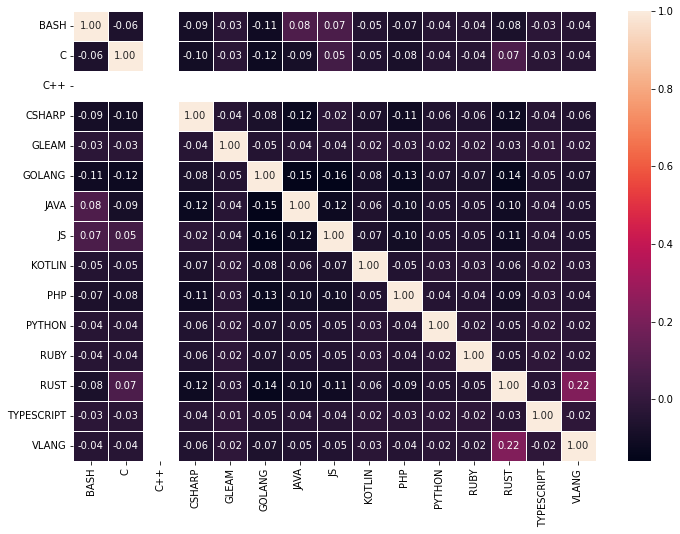

In [16]:
import seaborn as sn
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

plot = sn.heatmap(df[linguagens].corr(),annot = True, fmt=".2f", linewidths=.6)
plot

Analisando o gráfico, não aparece C++, e os maiores valores -exceto a linguagem com ela mesma- são alguns tons de roxo. Para deixar a visualização bem clara, podemos destacar todos os valores maiores que 0.01 de corelação.

<AxesSubplot:>

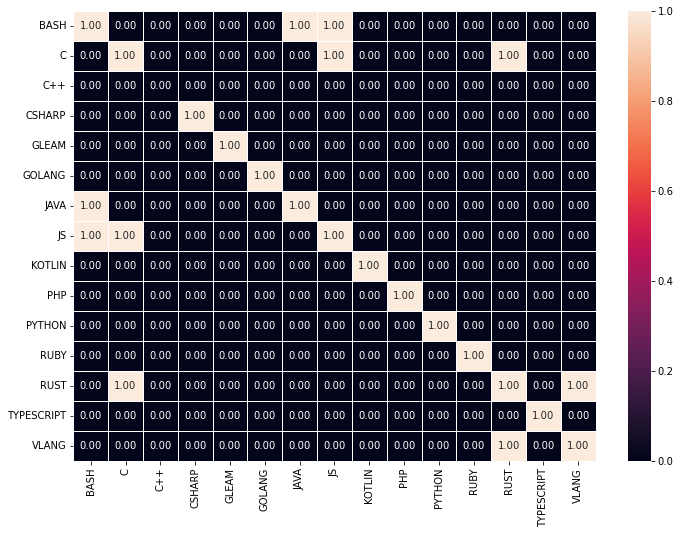

In [17]:
plot = sn.heatmap(df[linguagens].corr()>= 0.01, annot = True, fmt=".2f", linewidths=.6)
plot

Agora fica claro, que BASH aparece junto com JAVA e JAVASCRIPT por fim C com JAVASCRIPT e RUST. 

In [18]:
# Segue um exemplo
print(df.readme[df.query('RUST and C').index[0]])

# RINHA DE BACKEND NA LINGUAGEM MAIS _BLAZINGLY FAST™_ DO MERCADO. 🦀🔥

STACK:

- RUST (LINGUAGEM DE PROGRAMAÇÃO DE ALTO NÍVEL COM BAIXO FOOTPRINT DE MEMÓRIA E PERFORMANCE COMPARÁVEL COM A DE C/C++)
- ACTIX WEB (FRAMEWORK HTTP PARA RUST)
- TOKIO (RUNTIME ASYNC NÃO-BLOQUEANTE QUE UTILIZA LOOP DE EVENTOS SINGLE-THREADED)
- POSTGRESQL (BANCO DE DADOS RELACIONAL DE USO COMERCIAL GRATUITO QUE PRIORIZA CONSISTÊNCIA E DISPONIBILIDADE)
- DEADPOOL-POSTGRES (GERENCIADOR DE POOL DE CONEXÕES COM POSTGRES)
- SERDE (LIB DE DESSERIALIZAÇÃO/SERIALIZAÇÃO EM JSON)
- REDIS (BANCO DE DADOS NÃO-RELACIONAL DE CHAVE-VALOR EM MEMÓRIA COM BAIXA LATÊNCIA DE RESPOSTA)
- DEADPOOL-REDIS (GERENCIADOR DE POOL DE CONEXÕES COM REDIS)
- DEADQUEUE (LIB DE FILA ASSÍNCRONA PARA PROCESSAMENTO BATCH)
- NGINX (BALANCEADOR DE CARGA BASEADO EM EVENTOS)

GITHUB: [VINICIUSFONSECA](HTTPS://GITHUB.COM/VINICIUSFONSECA/)

TWITTER: [@DISTANTEAGLE16](HTTPS://TWITTER.COM/DISTANTEAGLE16)

REPOSITÓRIO: [VINICIUSFONSECA/RINHA-BACKEND-RUST]

Note que de fato a linguagem é RUST, C e C++ foi citada apenas como comparação. Outra fato é que C++ não apareceu no mapa de calor, ou seja, de acordo com aquele mapa, não teve ocorrencia de C++, mas na verdade o problema é que ")" não é considerado como borda na regex, mas isso não atrapalha o resultado uma vez que em geral não se escreve o nome da linguagem principal seguida de parenteses.

Para definir de fato qual a linguagem utilizada, vamos pegar a primeira linguagem que aparecer no texto

In [21]:
df = df_copy.copy()

# r'\b' +lang.replace('+', '\+')+ r'\b'


def pega_primeira_linguagem(txt):
    achadas = dict()
    for lang in linguagens:
        padrao = r'\b' +lang.replace('+', '\+')+ r'\b'
        reg = re.search(padrao, str(txt))
        if reg:
            achadas[reg.span()[0]] = lang
    if achadas:
        return achadas[min(achadas.keys())]
    else:
        return np.nan
           



for lang in linguagens:
    df['linguagem'] = df.readme.apply(pega_primeira_linguagem)


## Conclusões

Não foram identificadas as linguagens em 15 readmes

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   participante         90 non-null     object  
 1   readme               86 non-null     object  
 2   posicao              90 non-null     int64   
 3   contagem_pessoas     90 non-null     int64   
 4   intervalo_colocacao  90 non-null     category
 5   linguagem            75 non-null     object  
dtypes: category(1), int64(2), object(3)
memory usage: 6.6+ KB


A linguagem de programação mais utilizada foi GOLANG

In [23]:
df.linguagem.value_counts()

GOLANG        14
CSHARP        10
JS            10
JAVA           9
RUST           8
PHP            7
C              4
KOTLIN         3
BASH           3
PYTHON         2
RUBY           2
GLEAM          1
VLANG          1
TYPESCRIPT     1
Name: linguagem, dtype: int64

RUST foi a linguagem mais utilizada entre os 10 primeiros classificadas

In [24]:
df.groupby(by=['intervalo_colocacao', 'linguagem'], as_index=False)['participante']\
                .count().query('participante>0')\
                .sort_values(['intervalo_colocacao', 'participante'], ascending=[True, False])

,intervalo_colocacao,linguagem,participante
11,"(0, 10]",RUST,5
4,"(0, 10]",GOLANG,3
1,"(0, 10]",C,1
2,"(0, 10]",CSHARP,1
20,"(10, 20]",JS,3
24,"(10, 20]",RUBY,2
14,"(10, 20]",BASH,1
15,"(10, 20]",C,1
22,"(10, 20]",PHP,1
25,"(10, 20]",RUST,1


Tabela Final de participantes com a posição e a linguagem

In [25]:
df = df.sort_values('posicao'); df

,participante,readme,posicao,contagem_pessoas,intervalo_colocacao,linguagem
15,viniciusfonseca,# RINHA DE BACKEND NA LINGUAGEM MAIS _BLAZINGL...,1,44628,"(0, 10]",RUST
49,h4nkb31f0ng,# H4NKB31F0NG - GOLANG\n[REPOSITÓRIO](HTTPS://...,2,44270,"(0, 10]",GOLANG
81,grupo-2a,# GRUPO 2A\n\nA APLICAÇÃO FOI FEITA BASEADA NA...,3,44100,"(0, 10]",CSHARP
77,isadora-souza,# RINHA DE BACKEND 2023 - GOLANG\n\n## STACK\n...,4,42122,"(0, 10]",GOLANG
57,sofia_aripiprazole,# LEAN4 COM C++\n\nSOFIA E EU (GABI) FIZEMOS A...,5,40938,"(0, 10]",C
...,...,...,...,...,...,...
47,lucasnribeiro,,70,0,"(50, 100]",NaN
48,insalubre,# VLANG & PICO. VLANG \n\n| GITHUB | TWITTER/X...,70,0,"(50, 100]",VLANG
52,natanaelsimoes,# @NATANAELSIMOES - JS\n\n[ACESSE O FONTE AQUI...,70,0,"(50, 100]",JS
33,felipemarkson,# SIMPLE REST API IN PURE C.\n\n_BECAUSE I WAN...,70,0,"(50, 100]",C


In [31]:
os.chdir('../scripts/analise-de-dados/')

# Salvando em Excel
df.to_excel('participantes-posição-linguagem.xlsx', index=False)